The `%matplotlib` magic command is used here to enable plotting in the current notebook. The `inline` backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read measurements and GSSHA output: 

In [3]:
data = pd.read_excel('../Data/Feb2016flood_rain_discharge.xlsx', encoding="utf-16")
GSSHA = pd.read_csv('../Data/GSHHA_simulated_discharge.dat', encoding="utf-16", sep="\t", header=None, names=['time (min)', 'simulated discharge (cms)'])
data['simulated discharge (cms)'] = GSSHA[['simulated discharge (cms)']][::-1]
data['datetime'] = pd.date_range('2016-02-24 00:00', periods=data.shape[0], freq='Min')
data = data.set_index('datetime')

In [4]:
data

,time (min),rain (mm),measured discharge (cms),simulated discharge (cms)
datetime,,,,
2016-02-24 00:00:00,0,0.000,0.127272,0.0
2016-02-24 00:01:00,1,0.000,0.122293,0.0
2016-02-24 00:02:00,2,0.000,0.130469,0.0
2016-02-24 00:03:00,3,0.000,0.133975,0.0
2016-02-24 00:04:00,4,0.254,0.141986,0.0
2016-02-24 00:05:00,5,0.000,0.137718,0.0
2016-02-24 00:06:00,6,0.000,0.134968,0.0
2016-02-24 00:07:00,7,0.000,0.132955,0.0
2016-02-24 00:08:00,8,0.000,0.130174,0.0


#### Time series plot: 

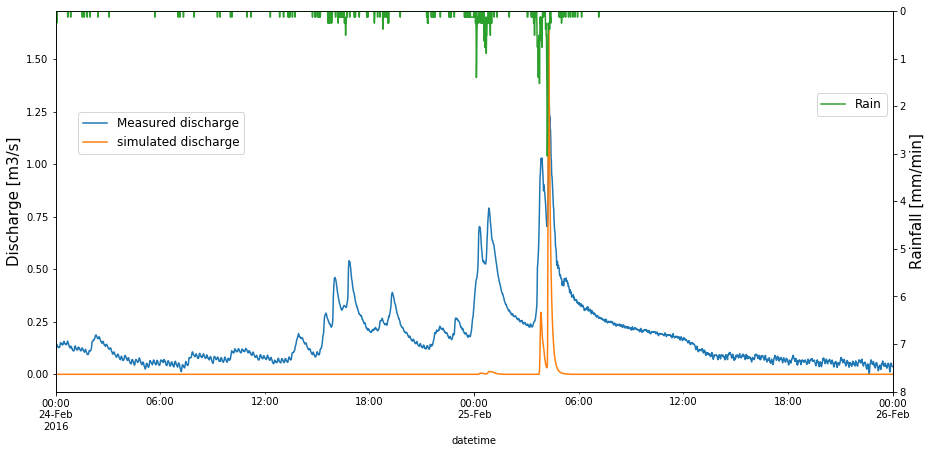

In [5]:
plt.figure(figsize=(15, 7))
ax_left = data['measured discharge (cms)'].plot()
data['simulated discharge (cms)'].plot()
plt.ylabel('Discharge [m3/s]', fontsize=15)
ax_right = data['rain (mm)'].plot(secondary_y='rain (mm)')
plt.ylim([8, 0])
plt.ylabel('Rainfall [mm/min]', fontsize=15)
ax_left.legend(['Measured discharge', 'simulated discharge'], bbox_to_anchor=(0.02, 0.75), loc=2, prop={'size': 12})
ax_right.legend(['Rain'], bbox_to_anchor=(1, 0.8), loc=1, prop={'size': 12})

#### Get the peak discharge and timing: 

In [6]:
peak_obs = data['measured discharge (cms)'].max()
peak_sim = data['simulated discharge (cms)'].max()

peak_time_obs = data['measured discharge (cms)'].idxmax()
peak_time_sim = data['simulated discharge (cms)'].idxmax()

print "The measured peak discharge is %.3f m3/s at %s" % (peak_obs, peak_time_obs)
print "The simulated peak discharge is %.3f m3/s at %s" % (peak_sim, peak_time_sim)

The measured peak discharge is 1.273 m3/s at 2016-02-25 04:19:00
The simulated peak discharge is 1.646 m3/s at 2016-02-25 04:17:00


#### Change time axis range and plot the time series: 

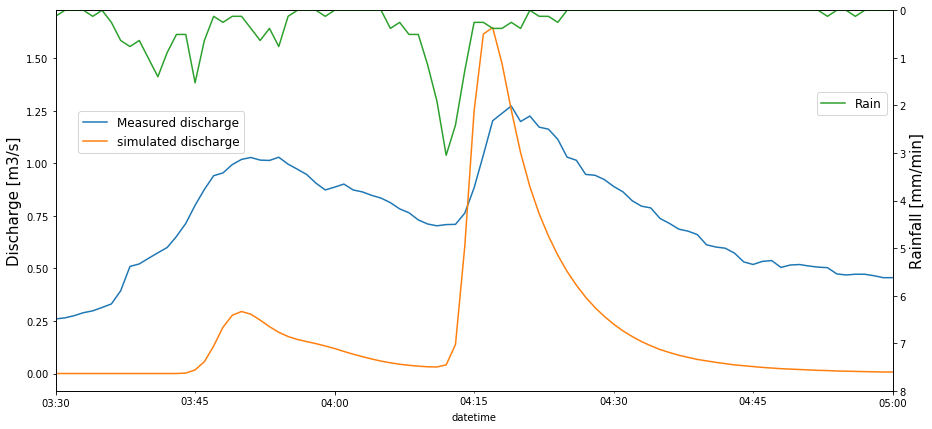

In [7]:
### Only select data from 03:30 am to 05:00 am on Feb 25, 2016
data_sel = data.loc[slice('2016-02-25 03:30', '2016-02-25 05:00')]

### Plot
plt.figure(figsize=(15, 7))
ax_left = data_sel['measured discharge (cms)'].plot()
data_sel['simulated discharge (cms)'].plot()
plt.ylabel('Discharge [m3/s]', fontsize=15)
ax_right = data_sel['rain (mm)'].plot(secondary_y='rain (mm)')
plt.ylim([8, 0])
plt.ylabel('Rainfall [mm/min]', fontsize=15)
ax_left.legend(['Measured discharge', 'simulated discharge'], bbox_to_anchor=(0.02, 0.75), loc=2, prop={'size': 12})
ax_right.legend(['Rain'], bbox_to_anchor=(1, 0.8), loc=1, prop={'size': 12})

#### Calculate the flow volume for selected period: 

In [8]:
volume_obs = np.trapz(data_sel['measured discharge (cms)'])*60
volume_sim = np.trapz(data_sel['simulated discharge (cms)'])*60

print "The measured flow volume for selected period is %.3f m3" % (volume_obs)
print "The simulated flow volume for selected period is %.3f m3" % (volume_sim)

The measured flow volume for selected period is 4036.937 m3
The simulated flow volume for selected period is 1146.330 m3
